<a href="https://colab.research.google.com/github/rb4050/Deep-learning/blob/main/Sentiment_Analysis_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 = Data Ingestion

In [2]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [4]:
df = pd.read_csv(url,sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Target feature = Liked
1. 0 = Disliked
2. 1 = Liked

# Step 2 = Data quality check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()

,0
Review,0
Liked,0


In [7]:
df.duplicated().sum()

np.int64(4)

In [8]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
991,I think food should have flavor and texture an...,0
992,Appetite instantly gone.,0
993,Overall I was not impressed and would not go b...,0
994,"The whole experience was underwhelming, and I ...",0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(996, 2)

# Step 3 = preprocessing

In [11]:
import re

def preprocess_text(text :str) -> str:
  # str to lower case
  lower = text.lower()
  # remove puntuations
  no_punc = re.sub("[^a-z0-9 ]", "", lower) # provide space after a-z0-9 always
  return no_punc


In [12]:
preprocess_text("Hello")

'hello'

In [13]:
preprocess_text("Hello, how are you?")

'hello how are you'

In [14]:
df["pre"] = df["Review"].apply(preprocess_text)
df.head()

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# step 4 = sep x and y

In [15]:
x = df["pre"]
y = df["Liked"]

In [16]:
x.head()

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [17]:
y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


# Apply TFIDF vectoriczer = term freq inverse document function

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(x).toarray()
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_pre.shape

(996, 2067)

# reducing number of columns by
# Dimentionality Reduction
SVD = singular value decomposition

In [21]:
from sklearn.decomposition import TruncatedSVD


In [22]:
# i want to extract 300 columns
n_components = 300

svd = TruncatedSVD(n_components)
x_pre_red = svd.fit_transform(x_pre)
x_pre_red

array([[ 0.11234099,  0.17803331,  0.29196748, ..., -0.01353611,
         0.04750804, -0.0217962 ],
       [ 0.20083947,  0.0587346 ,  0.10989349, ..., -0.01247647,
         0.04301796,  0.06006476],
       [ 0.2485332 , -0.0588533 , -0.10330661, ..., -0.01323071,
        -0.03180579, -0.01213208],
       ...,
       [ 0.25543931,  0.21182253, -0.26910278, ...,  0.01423714,
        -0.01281393,  0.00034815],
       [ 0.21812549,  0.05129193, -0.08255952, ...,  0.00765922,
        -0.01955048,  0.00388594],
       [ 0.22365309,  0.03375238, -0.02299508, ..., -0.0005156 ,
        -0.01563548, -0.02436751]])

In [23]:
x_pre_red.shape

(996, 300)

# Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre_red,y,test_size=0.2,random_state=42)

In [26]:
xtrain

array([[ 0.18927921, -0.04048831, -0.0154349 , ..., -0.0076329 ,
         0.01609812, -0.05546677],
       [ 0.21913912,  0.1713122 , -0.18229741, ...,  0.01613731,
        -0.05308538,  0.04225323],
       [ 0.25679083, -0.06635432,  0.09968225, ...,  0.02726199,
         0.00964539,  0.0006706 ],
       ...,
       [ 0.0337032 , -0.00273152,  0.00977991, ..., -0.05511299,
         0.01802975,  0.04805484],
       [ 0.16613151, -0.06999122, -0.0668464 , ..., -0.02153133,
        -0.02287279, -0.02890385],
       [ 0.17532897,  0.05002575,  0.01640282, ..., -0.0126693 ,
         0.04995637, -0.01810366]])

In [27]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [28]:
xtest

array([[ 8.61226101e-02, -2.87863990e-02, -3.12089444e-02, ...,
        -1.19140425e-02, -6.42119295e-03,  3.39816801e-03],
       [ 3.82920023e-02,  4.37524866e-04, -1.41325355e-02, ...,
         1.96532463e-02,  7.59419780e-02,  2.00512113e-03],
       [ 1.14576640e-01,  5.20985350e-01, -4.26972407e-01, ...,
         5.49705258e-05,  1.90881658e-02, -9.19472383e-03],
       ...,
       [ 2.11511969e-01, -1.21001200e-01, -8.86613905e-03, ...,
        -2.91608241e-02, -3.76940502e-02, -2.15047213e-02],
       [ 1.51067299e-01, -5.68999351e-02, -1.61801205e-02, ...,
        -2.12306065e-02, -1.88788778e-04, -5.76464772e-04],
       [ 1.19169225e-01,  1.29376987e-01, -2.43243448e-02, ...,
         2.02717630e-05,  1.77750097e-02, -1.58490425e-02]])

In [29]:
ytest.head()

,Liked
832,1
970,0
96,1
587,0
450,0


In [30]:
xtrain.shape

(796, 300)

In [31]:
xtest.shape

(200, 300)

In [32]:
ytrain.shape

(796,)

In [33]:
ytest.shape

(200,)

# Build and train the Neural Network

1. L1 = lasso = penality applied of absolute value of weights

2. L2 = ridge = penality applied on squared value of weights


In [34]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

In [35]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ]
)

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [38]:
es = EarlyStopping(patience=10,restore_best_weights=True)

In [39]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,callbacks=[es])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.5037 - loss: 3.0301 - val_accuracy: 0.4900 - val_loss: 2.2110
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4976 - loss: 2.0124 - val_accuracy: 0.4650 - val_loss: 1.5164
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5686 - loss: 1.4002 - val_accuracy: 0.4700 - val_loss: 1.1280
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5559 - loss: 1.0628 - val_accuracy: 0.4950 - val_loss: 0.9183
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5798 - loss: 0.8844 - val_accuracy: 0.4850 - val_loss: 0.8090
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6434 - loss: 0.7877 - val_accuracy: 0.5900 - val_loss: 0.7517
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6596 - loss: 0.7366 - val_accuracy: 0.7150 - val_loss: 0.7204
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7640 - loss: 0.7075 - val_accuracy: 0.6700 -

# plot learning curve

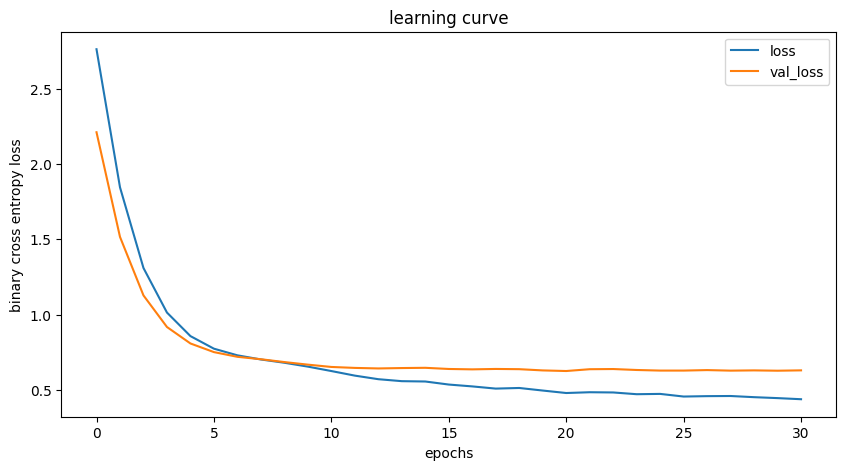

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("binary cross entropy loss")
plt.title("learning curve")
plt.legend()
plt.show()

# with above curve it is clear that model is trained properly

# Model Evaluation

In [41]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9600 - loss: 0.4485


[0.446301132440567, 0.9623115658760071]

In [42]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8042 - loss: 0.6297 


[0.6261680126190186, 0.8100000023841858]

# confusion matrix

In [43]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [44]:
yprob_train[0:5]

array([[0.15624683],
       [0.21629266],
       [0.85923296],
       [0.9332037 ],
       [0.33610544]], dtype=float32)

In [46]:
ypred_train = [1 if p > 0.5 else 0 for p in yprob_train]
ypred_test = [1 if p > 0.5 else 0 for p in yprob_test]

In [47]:
yprob_test[0:5]

array([[0.93544585],
       [0.2406436 ],
       [0.44681677],
       [0.26492321],
       [0.08677445]], dtype=float32)

In [51]:
ypred_train[0:5]

[0, 0, 1, 1, 0]

In [50]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [52]:
ypred_test[0:5]

[1, 0, 0, 0, 0]

In [53]:
ytest.head()

,Liked
832,1
970,0
96,1
587,0
450,0


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

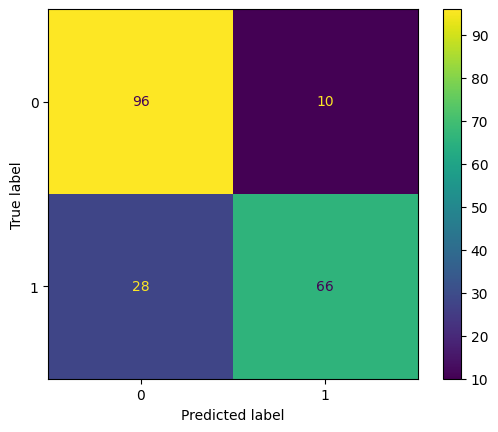

In [55]:
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       106
           1       0.87      0.70      0.78        94

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.82      0.81      0.81       200



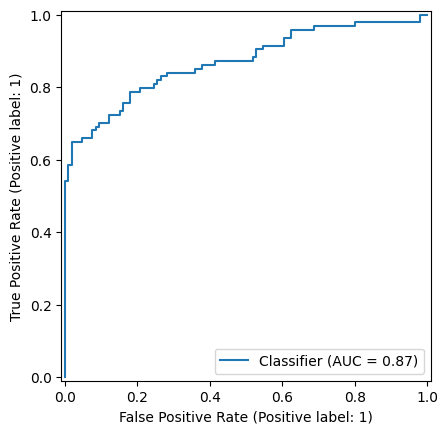

In [59]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest,yprob_test)

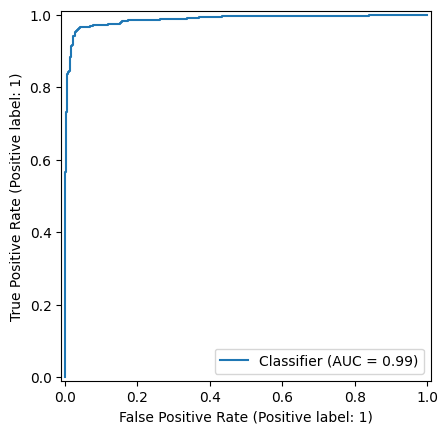

In [60]:
RocCurveDisplay.from_predictions(ytrain,yprob_train)

# from above results it is clear that the model is a good model

# Out of sample Prediction

In [65]:
def predict_sentiment(text : str) -> tuple:
  pre1 = preprocess_text(text)
  pre2 = tfidf.transform([pre1]).toarray()
  red_text = svd.transform(pre2)
  prob = model.predict(red_text)
  pred = 1 if prob > 0.5 else 0
  return {
      "text" : text,
      "Prediction" : pred,
      "Probability" : prob.round(3)
  }

In [66]:
predict_sentiment("food is not good ! ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


{'text': 'food is not good ! ',
 'Prediction': 0,
 'Probability': array([[0.316]], dtype=float32)}

In [67]:
predict_sentiment("Wow ! liked the place and ambience")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


{'text': 'Wow ! liked the place and ambience',
 'Prediction': 1,
 'Probability': array([[0.786]], dtype=float32)}

In [69]:
predict_sentiment("did not liked the food")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


{'text': 'did not liked the food',
 'Prediction': 0,
 'Probability': array([[0.098]], dtype=float32)}

In [70]:
predict_sentiment("Great amazing food")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


{'text': 'Great amazing food',
 'Prediction': 1,
 'Probability': array([[0.986]], dtype=float32)}

# can predict any type of sentiment

In [71]:
predict_sentiment("the service was not good")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


{'text': 'the service was not good',
 'Prediction': 0,
 'Probability': array([[0.268]], dtype=float32)}

# Save the model and preprocessor

In [72]:
tfidf

TfidfVectorizer()

In [74]:
svd

TruncatedSVD(n_components=300)

In [75]:
model

<Sequential name=sequential, built=True>

In [76]:
import joblib

In [77]:
joblib.dump(tfidf,"tfidf.joblib")
joblib.dump(svd,"svd.joblib")


['svd.joblib']

In [78]:
model.save("Sentiment_model.keras")

# Load the object from files

In [79]:
tfidf_obj = joblib.load("tfidf.joblib")
svd_obj = joblib.load("svd.joblib")

In [80]:
tfidf_obj

TfidfVectorizer()

In [81]:
svd_obj

TruncatedSVD(n_components=300)

In [83]:
from keras.models import load_model

In [84]:
m = load_model("Sentiment_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)